In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.collab import *

In [8]:
import zipfile
with zipfile.ZipFile('/content/movielens-100k-dataset.zip') as f:
  f.extractall('/content')
path = Path('/content/ml-100k')
path.ls()

[PosixPath('/content/ml-100k/ub.test'),
 PosixPath('/content/ml-100k/u.occupation'),
 PosixPath('/content/ml-100k/ub.base'),
 PosixPath('/content/ml-100k/u.user'),
 PosixPath('/content/ml-100k/allbut.pl'),
 PosixPath('/content/ml-100k/mku.sh'),
 PosixPath('/content/ml-100k/ua.test'),
 PosixPath('/content/ml-100k/u2.test'),
 PosixPath('/content/ml-100k/u5.base'),
 PosixPath('/content/ml-100k/u3.test'),
 PosixPath('/content/ml-100k/u4.base'),
 PosixPath('/content/ml-100k/u3.base'),
 PosixPath('/content/ml-100k/u2.base'),
 PosixPath('/content/ml-100k/ua.base'),
 PosixPath('/content/ml-100k/README'),
 PosixPath('/content/ml-100k/u.item'),
 PosixPath('/content/ml-100k/u.data'),
 PosixPath('/content/ml-100k/u5.test'),
 PosixPath('/content/ml-100k/u.info'),
 PosixPath('/content/ml-100k/u1.base'),
 PosixPath('/content/ml-100k/u1.test'),
 PosixPath('/content/ml-100k/u.genre'),
 PosixPath('/content/ml-100k/u4.test')]

In [14]:
ratings = pd.read_csv(path/'u.data',delimiter='\t',header = None,names = ['user_id','movie_id','ratings','timestamp'])
ratings.head()

,user_id,movie_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,names=['movie_id', 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movie_id,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [25]:
len(ratings)

100000

In [26]:
len(movies)

1682

In [0]:
movie_rating = ratings.merge(movies[['movie_id','title']])

In [28]:
movie_rating.head()

,user_id,movie_id,ratings,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(movie_rating, seed=101, valid_pct=0.1, item_name='title')

In [33]:
data.show_batch()

user_id,title,target
230,Mission: Impossible (1996),4.0
901,"Deer Hunter, The (1978)",2.0
85,As Good As It Gets (1997),3.0
905,Trainspotting (1996),3.0
459,Liar Liar (1997),5.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1,metrics=mean_squared_error)

epoch,train_loss,valid_loss,mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


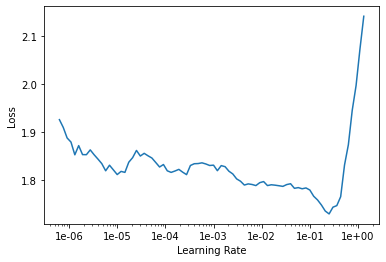

In [39]:
learn.lr_find()
learn.recorder.plot(skip_end=10)


In [40]:
learn.fit_one_cycle(6,1e-02,)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.919837,0.952254,0.952254,00:09
1,0.901587,0.930416,0.930416,00:09
2,0.820803,0.899053,0.899053,00:09
3,0.735107,0.859939,0.859939,00:09
4,0.526336,0.841735,0.841735,00:09
5,0.389116,0.844468,0.844468,00:09
